<a href="https://colab.research.google.com/github/karthikasi/Task-7/blob/main/KNN_Assignment13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Social_Networks_Ads.csv

**Importing the libraries**

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 


**Importing the dataset**

In [2]:
df=pd.read_csv("Social_Network_Ads.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df["Gender"]= df.Gender.map({"Male":0,"Female":1})
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,0,19,19000,0
1,15810944,0,35,20000,0
2,15668575,1,26,43000,0
3,15603246,1,27,57000,0
4,15804002,0,19,76000,0


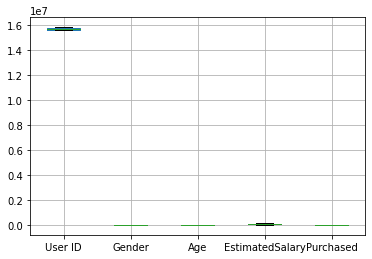

In [5]:
df.boxplot()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


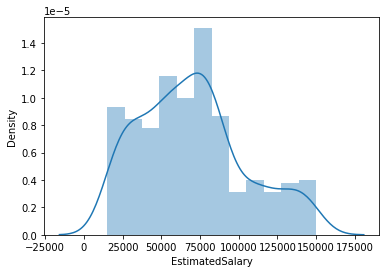

In [7]:
sns.distplot(df["EstimatedSalary"])

**Splitting the dataset into the Training set and Test set**

In [8]:
X=df[["Gender","Age","EstimatedSalary"]].values
y=df["Purchased"].values


In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=3)


**Feature Scaling**

In [10]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train,y_train)
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [14]:
scaler.var_

array([2.48593750e-01, 1.14398428e+02, 1.14258335e+09])

In [12]:
X_train_scaled

array([[ 0.92761259,  1.4167466 ,  2.15546758],
       [-1.07803625, -0.26616955,  0.05500764],
       [-1.07803625,  0.38829784,  2.33297124],
       [ 0.92761259,  0.66878386, -1.4241895 ],
       [ 0.92761259,  0.85577455, -0.56625516],
       [-1.07803625,  0.38829784,  0.29167919],
       [-1.07803625,  0.10781182,  1.0608617 ],
       [-1.07803625,  0.01431647, -0.32958361],
       [ 0.92761259,  0.2948025 , -0.21124784],
       [ 0.92761259, -0.17267421, -0.5958391 ],
       [ 0.92761259, -0.54665557,  1.38628507],
       [ 0.92761259, -1.29461831, -1.12835007],
       [ 0.92761259, -1.10762762,  0.05500764],
       [ 0.92761259,  0.85577455,  2.18505153],
       [-1.07803625,  0.94926989, -1.09876613],
       [ 0.92761259,  0.94926989,  1.80046027],
       [-1.07803625, -0.73364626,  0.29167919],
       [ 0.92761259,  1.97771865,  0.17334342],
       [ 0.92761259,  0.76227921, -0.86209458],
       [-1.07803625, -1.01413228, -0.35916756],
       [-1.07803625, -0.35966489,  1.238

**Fitting K-NN to the Training set**

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
for i in [1,2,3,4,5,6,7,8,9,10,20,50]:
  knn = KNeighborsClassifier(i) #initialising the model
  knn.fit(X_train_scaled,y_train) # training the model
  print("K value  : " , i, " train score : ", knn.score(X_train_scaled,y_train) , " score : ", np.mean(cross_val_score(knn, X_train_scaled, y_train, cv=5)))

K value  :  1  train score :  0.996875  score :  0.878125
K value  :  2  train score :  0.93125  score :  0.878125
K value  :  3  train score :  0.940625  score :  0.903125
K value  :  4  train score :  0.925  score :  0.90625
K value  :  5  train score :  0.921875  score :  0.90625
K value  :  6  train score :  0.91875  score :  0.90625
K value  :  7  train score :  0.915625  score :  0.9125
K value  :  8  train score :  0.921875  score :  0.90625
K value  :  9  train score :  0.915625  score :  0.915625
K value  :  10  train score :  0.91875  score :  0.915625
K value  :  20  train score :  0.9125  score :  0.871875
K value  :  50  train score :  0.809375  score :  0.765625


In [17]:
knn = KNeighborsClassifier(5) # k - hyperparaqmeter
knn.fit(X_train_scaled,y_train)
knn.score(X_test_scaled,y_test) # score - Accuracy here.. of test score.

0.9

**Predicting the Test set results**

In [18]:
y_pred=knn.predict(X_test_scaled)
y_pred

array([0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0])

**Making the Confusion Matrix**

In [20]:
from sklearn.metrics import plot_roc_curve, roc_curve, roc_auc_score, confusion_matrix, f1_score
confusion_matrix(y_test,y_pred)

array([[50,  5],
       [ 3, 22]])

In [22]:
knn.score(X_test_scaled,y_pred)

1.0

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


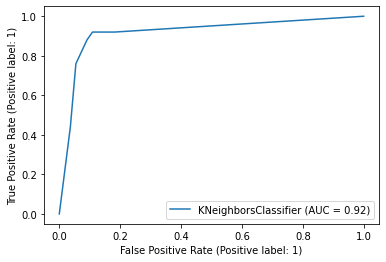

In [23]:
plot_roc_curve(knn,X_test_scaled,y_test)

In [24]:
f1_score(y_test,y_pred)

0.8461538461538461